In [3]:
import pandas as pd
import numpy as np

In [5]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [10]:
dates = pd.date_range("20231204", periods=6)
print(dates)

DatetimeIndex(['2023-12-04', '2023-12-05', '2023-12-06', '2023-12-07',
               '2023-12-08', '2023-12-09'],
              dtype='datetime64[ns]', freq='D')


In [9]:
np.random.randn(6,4)

array([[-0.89797905, -0.27399558, -0.59202948,  0.47837431],
       [-0.79618978, -0.56884944,  1.06609069,  1.60660395],
       [-1.07873538,  0.44340487, -0.57533754,  1.32786207],
       [ 1.52618112,  1.20155344, -0.30220156, -0.89963628],
       [ 1.34618521,  1.41535732, -1.1588721 ,  0.37246075],
       [ 0.66014477, -0.87665474,  0.07678172,  0.96286778]])

In [12]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2023-12-04,1.047856,0.521953,-2.180260,0.717248
2023-12-05,-1.534427,0.719334,0.089757,-1.626603
2023-12-06,-0.533479,0.407493,1.314571,0.780048
2023-12-07,1.309919,0.256384,1.539064,-1.051424
2023-12-08,-0.454033,0.057165,0.390574,-0.200129
2023-12-09,-0.943832,1.458693,0.830700,0.678128


In [14]:
print(df['B'])

2023-12-04    0.521953
2023-12-05    0.719334
2023-12-06    0.407493
2023-12-07    0.256384
2023-12-08    0.057165
2023-12-09    1.458693
Freq: D, Name: B, dtype: float64


# Let's practice with Jena temperature datasets

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras


2023-12-04 19:43:13.679124: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-04 19:43:13.804175: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 19:43:13.804202: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 19:43:13.804808: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 19:43:13.850566: I tensorflow/core/platform/cpu_feature_g

In [16]:
df = pd.read_csv('jena_climate_2009_2016.csv')

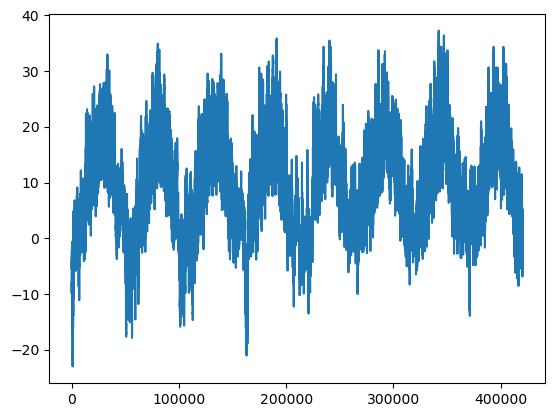

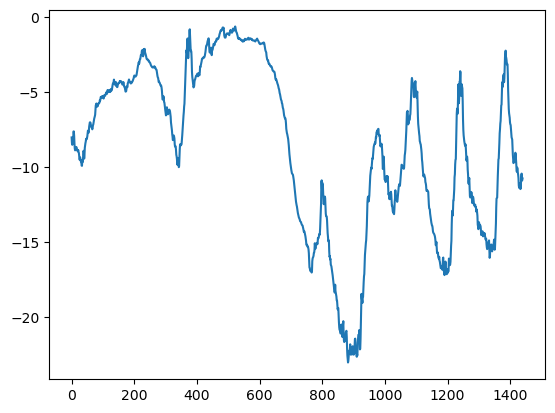

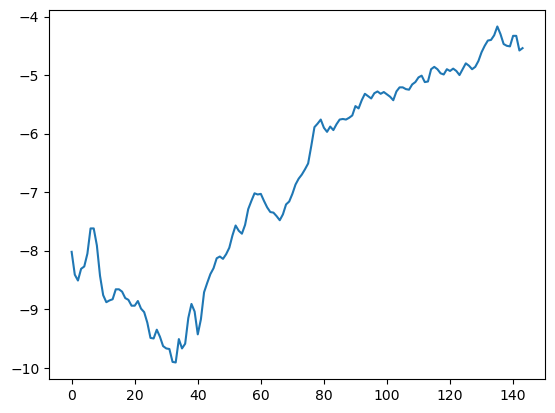

In [33]:
temp_column = df.columns[2]
df[temp_column].plot()
plt.show()
plt.figure()
df[temp_column][:1440].plot()
plt.show()
plt.figure()
df[temp_column][:144].plot()
plt.show()

In [37]:
num_samples = df.shape[0]
num_train_samples = int(num_samples/2)
num_val_samples = int(num_samples/4)
num_test_samples = int(num_samples/4)

In [67]:
columns = len(df.columns)

In [55]:
# data normalization
for i in range(1, columns):
    mean = df.iloc[:,i].mean(axis=0)
    df.iloc[:,i] -= mean
    std = df.iloc[:,i].std(axis=0)
    df.iloc[:,i] /= std



In [65]:
df.shape[0]

420451

In [75]:
temperature = df.iloc[:,2].to_numpy()
print(temperature)

column_numbers = [1,3,4,5,6,7,8,9,10,11,12,13]
data = df.iloc[:, column_numbers].to_numpy()
print(data)

[-2.07374406 -2.12004209 -2.13191337 ... -1.49679941 -1.62382221
 -1.69386281]
[[ 0.87415899 -2.127168   -2.0584197  ...  2.29331785 -0.7136384
  -0.76154437]
 [ 0.88014025 -2.17302435 -2.11487984 ...  2.34459725 -0.9146982
  -0.86835998]
 [ 0.87535524 -2.18478239 -2.11933722 ...  2.35560356 -1.2584456
  -1.24007832]
 ...
 [ 1.2689216  -1.58512245 -1.95589996 ...  1.80904018 -0.6812094
  -0.65472875]
 [ 1.26772535 -1.71093346 -2.00344534 ...  1.93836433 -0.41529161
  -0.58636676]
 [ 1.2689216  -1.77913008 -1.98710162 ...  2.00890477 -0.58392241
  -0.67181925]]


In [77]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate*(sequence_length + 24 - 1)
batch_size = 256

In [78]:
train_dataset = keras.utils.timeseries_dataset_from_array(
    data[:-delay],
    targets = temperature[delay:],
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size,
    start_index = 0,
    end_index = num_train_samples
)

2023-12-04 20:19:44.093259: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-04 20:19:44.105040: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-04 20:19:44.105138: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [79]:
val_dataset = keras.utils.timeseries_dataset_from_array(
    data[:-delay],
    targets = temperature[delay:],
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size,
    start_index = num_train_samples,
    end_index = num_train_samples + num_val_samples
)

In [80]:
test_dataset = keras.utils.timeseries_dataset_from_array(
    data[:-delay],
    targets = temperature[delay:],
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size,
    start_index = num_train_samples + num_val_samples
)

In [83]:
for samples, targets in train_dataset:
    print(f"sample shape: {samples.shape}")
    print(f"target shape: {targets.shape}")
    break

sample shape: (256, 120, 12)
target shape: (256,)


In [85]:
data.shape[-1]

12

In [90]:
inputs = keras.Input(shape=(sequence_length, data.shape[-1]))
x = keras.layers.LSTM(16)(inputs)
outputs = keras.layers.Dense(1)(x)

model = keras.Model(inputs, outputs)

# callbacks = [
#     keras.callbacks.ModelCheckpoint(filepath="jena_lstm.keras", 
#                                     save_best_only = True)
# ]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

model.save(filepath="jena_lstm.keras")

Epoch 1/10
819/819 [==============================] - 7s 7ms/step - loss: 0.1756 - mae: 0.3193 - val_loss: 0.1255 - val_mae: 0.2758
Epoch 2/10
819/819 [==============================] - 6s 7ms/step - loss: 0.1331 - mae: 0.2853 - val_loss: 0.1240 - val_mae: 0.2751
Epoch 3/10
819/819 [==============================] - 6s 7ms/step - loss: 0.1259 - mae: 0.2780 - val_loss: 0.1296 - val_mae: 0.2815
Epoch 4/10
819/819 [==============================] - 6s 7ms/step - loss: 0.1204 - mae: 0.2724 - val_loss: 0.1361 - val_mae: 0.2894
Epoch 5/10
819/819 [==============================] - 6s 7ms/step - loss: 0.1148 - mae: 0.2661 - val_loss: 0.1376 - val_mae: 0.2909
Epoch 6/10
819/819 [==============================] - 6s 7ms/step - loss: 0.1093 - mae: 0.2598 - val_loss: 0.1473 - val_mae: 0.3019
Epoch 7/10
819/819 [==============================] - 6s 7ms/step - loss: 0.1055 - mae: 0.2550 - val_loss: 0.1440 - val_mae: 0.2984
Epoch 8/10
819/819 [==============================] - 6s 7ms/step - loss: 0.

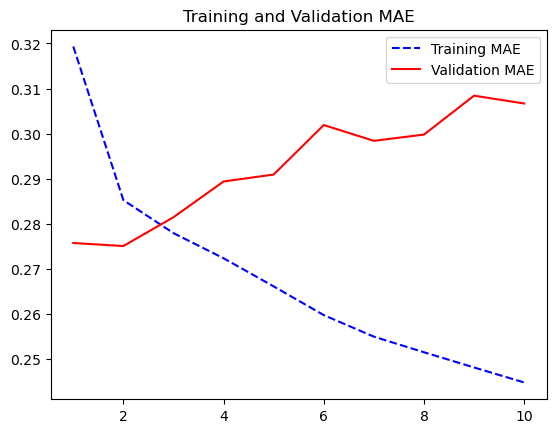

In [96]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "b--", label="Training MAE")
plt.plot(epochs, val_loss, "r", label ="Validation MAE")
plt.title("Training and Validation MAE")
plt.legend()
plt.show()